In [2]:
import poppy
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt
import numpy as np

/Users/tim/conda/envs/astroconda/lib/python3.5/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/tim/conda/envs/astroconda/lib/python3.5/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/tim/conda/envs/astroconda/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


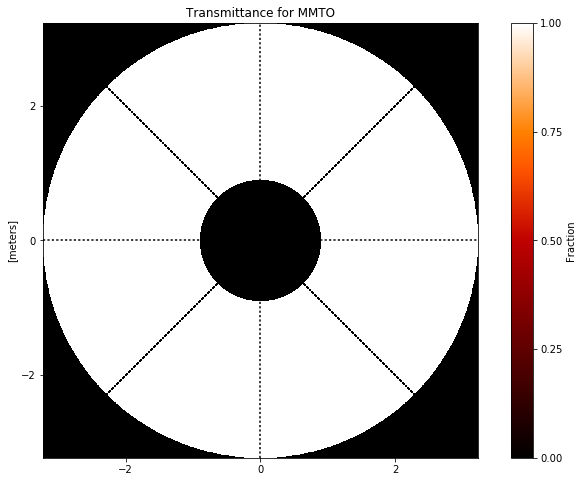

In [3]:
osys = poppy.OpticalSystem()
primary = poppy.CircularAperture(radius=3.2285)
secondary = poppy.SecondaryObscuration(secondary_radius=0.9, n_supports=4, support_width=0.02, support_angle_offset=45.)
mmt = poppy.CompoundAnalyticOptic(opticslist=[primary, secondary], name="MMTO")
plt.figure(figsize=(12,8))
mmt.display(npix=1024, colorbar_orientation='vertical')

plt.show()

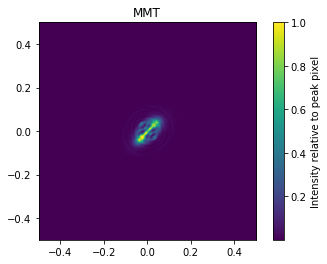

In [4]:
osys = poppy.OpticalSystem()
coeffs = [0, 0, 0e-6, 150e-9, 90e-9, -1e-9 , 1e-9, 1e-9, -1e-9, 5e-9, 0.0, 5e-9]
osys.add_pupil(mmt)
wfe = poppy.ZernikeWFE(radius=3.2285, coefficients=coeffs)
osys.add_pupil(wfe)
osys.add_detector(pixelscale=0.01, fov_arcsec=1.0)

psf = osys.calc_psf(5.5e-7)
poppy.display_psf(psf, scale='linear', title="MMT", normalize='peak', vmin=1.0e-5, vmax=1.0, cmap='viridis')
plt.show()

In [5]:
poppy.display_psf?

In [6]:
np.hypot?

In [16]:
y = np.linspace(0, 1, 12).reshape(1, -1)
x = np.linspace(0, 1, 10).reshape(-1, 1)
r = np.sqrt(x**2 + y**2)

In [18]:
r.shape

(10, 12)

In [19]:
x.shape

(10, 1)

In [21]:
np.linalg.pinv?

In [22]:
a = {'a': 1, "b": 2}

In [26]:
list(a.values())

[1, 2]

In [43]:
b = np.array([1])

In [44]:
np.resize(b, (5,))

array([1, 1, 1, 1, 1])

In [41]:
np.resize?

In [46]:
int("Z13".replace("Z", ""))

13

In [47]:
sorted(a.keys())

['a', 'b']

In [56]:
c = "Z1333"

In [49]:
if "Z" in c:
    print("g")

g


In [50]:
import re

In [57]:
re.match('Z\d', c)

<_sre.SRE_Match object; span=(0, 2), match='Z1'>

In [59]:
a['g']

KeyError: 'g'

In [60]:
import astropy.units as u

In [77]:
c = 100 * u.nm
if c != 100:
    print("u")

u


In [69]:
d = u.Quantity(np.arange(10), u.nm)

In [71]:
e = u.Quantity(d, u.m)

In [72]:
e

<Quantity [  0.00000000e+00,  1.00000000e-09,  2.00000000e-09,
             3.00000000e-09,  4.00000000e-09,  5.00000000e-09,
             6.00000000e-09,  7.00000000e-09,  8.00000000e-09,
             9.00000000e-09] m>

In [73]:
e[0] = 1 * u.um

In [81]:
e.

TypeError: data type not understood

In [83]:
print(repr(e))

<Quantity [  1.00000000e-06,  1.00000000e-09,  2.00000000e-09,
             3.00000000e-09,  4.00000000e-09,  5.00000000e-09,
             6.00000000e-09,  7.00000000e-09,  8.00000000e-09,
             9.00000000e-09] m>


In [88]:
print("%12s" % c)

    100.0 nm


In [89]:
a.items()

dict_items([('a', 1), ('b', 2)])

In [93]:
type(u.nm)

astropy.units.core.PrefixUnit

In [94]:
500000/(30*12)

1388.888888888889

In [96]:
loan = 500000.
rate = -0.25/100.
for i in range(30*12):
    interest = rate*loan
    loan += interest
loan/(30*12)

564.0441155117074

In [103]:
e.to(u.m)

<Quantity [  1.00000000e-06,  1.00000000e-09,  2.00000000e-09,
             3.00000000e-09,  4.00000000e-09,  5.00000000e-09,
             6.00000000e-09,  7.00000000e-09,  8.00000000e-09,
             9.00000000e-09] m>

In [102]:
e

<Quantity [  1.00000000e-06,  1.00000000e-09,  2.00000000e-09,
             3.00000000e-09,  4.00000000e-09,  5.00000000e-09,
             6.00000000e-09,  7.00000000e-09,  8.00000000e-09,
             9.00000000e-09] m>

In [112]:
a = 1 * u.deg

In [113]:
a.to(u.rad)

<Quantity 0.017453292519943295 rad>

In [114]:
a + 1

UnitsError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [115]:
u.arcsec

Unit("arcsec")

In [116]:
cc = 44.4 * u.nm / u.arcsec

In [117]:
coma = 400 * u.nm
coma/cc

<Quantity 9.00900900900901 arcsec>

In [118]:
ff = 40.8 * u.nm / u.um

In [121]:
2000*u.nm/ff

<Quantity 49.01960784313726 um>